In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
import random,warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv(r"C:\Users\Taha Alam\Downloads\creditcard.csv\creditcard.csv")
df.shape
df.info
df.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [34]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(1081)

In [36]:
df = df.drop_duplicates()

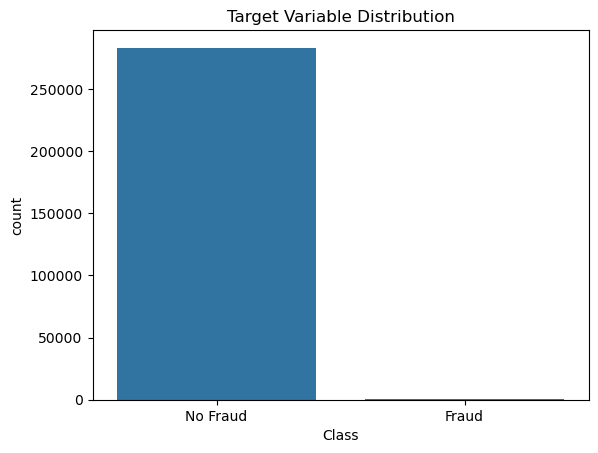

In [37]:
sns.countplot(x="Class",data=df)       
plt.xticks([0,1],['No Fraud','Fraud'],rotation=0)
plt.title("Target Variable Distribution")
plt.show()

([<matplotlib.axis.XTick at 0x1321dc42fd0>,
 [Text(0, 0, 'No Fraud'), Text(1, 0, 'Fraud')])

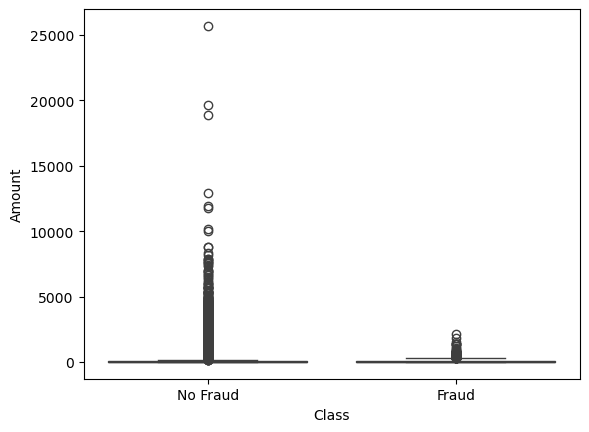

In [38]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.xticks([0,1],['No Fraud','Fraud'],rotation=0)

In [39]:
corr=df.corr()
print(corr['Class'].abs().sort_values(ascending=False))

Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
Name: Class, dtype: float64


In [40]:
corr_matrix = df.corr(numeric_only=True)
corr_with_class = corr_matrix['Class'].abs()
selected_features = corr_with_class[corr_with_class > 0.2].index.drop('Class')
df_selected = df[selected_features]
df_selected

,V10,V12,V14,V17
0,0.090794,-0.617801,-0.311169,0.207971
1,-0.166974,1.065235,-0.143772,-0.114805
2,0.207643,0.066084,-0.165946,1.109969
3,-0.054952,0.178228,-0.287924,-0.684093
4,0.753074,0.538196,-1.119670,-0.237033
...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691
284803,-0.975926,0.915802,-0.675143,-0.025693
284804,-0.484782,0.063119,-0.510602,0.313502
284805,-0.399126,-0.962886,0.449624,0.509928


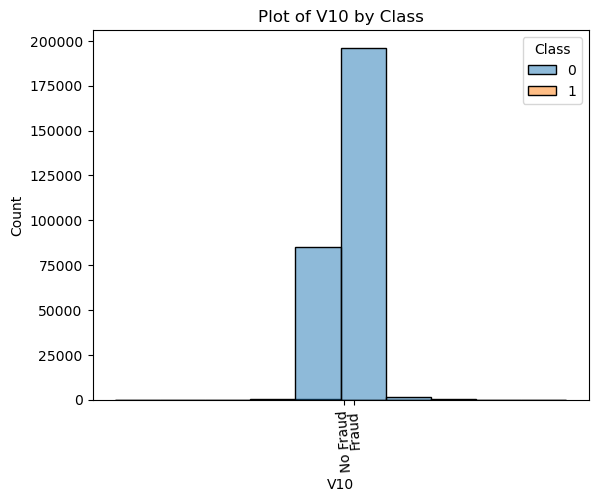

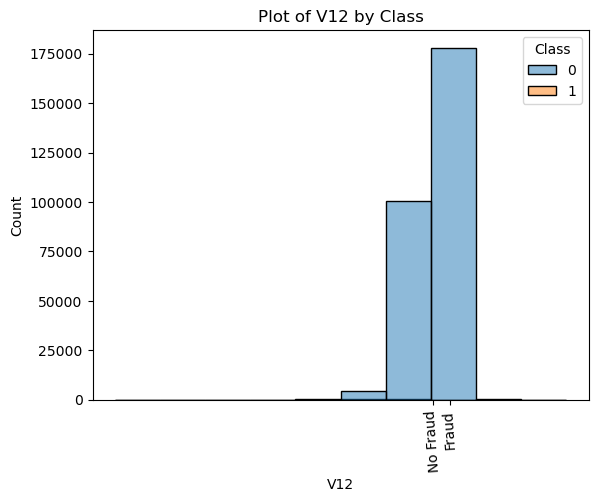

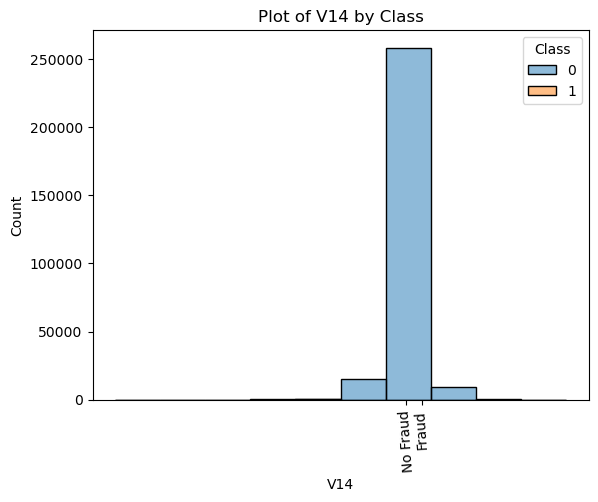

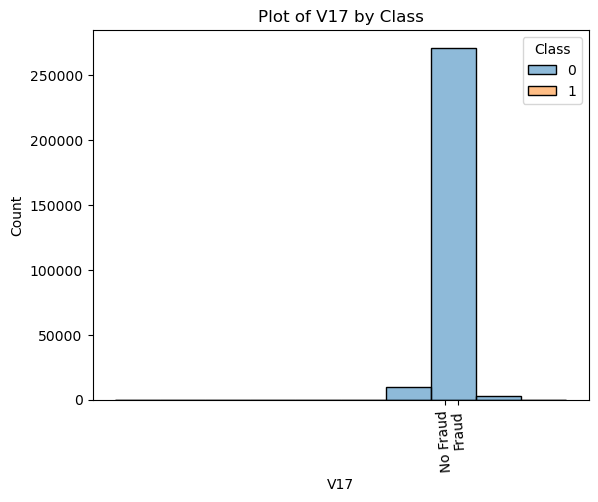

In [41]:
for feature in selected_features:
    sns.histplot(data=df, x=feature, hue='Class', bins=10) 
    plt.xticks([0,1],["No Fraud",'Fraud'],rotation=94,fontsize=10)
    plt.title(f'Plot of {feature} by Class')
    plt.show()

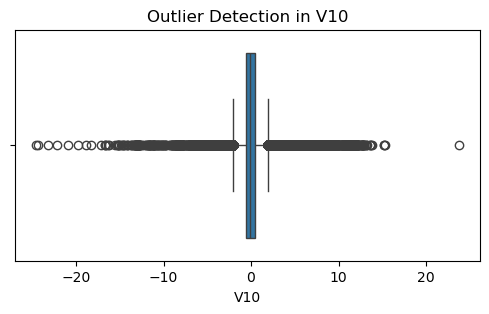

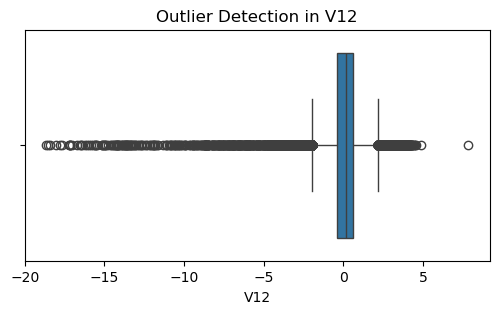

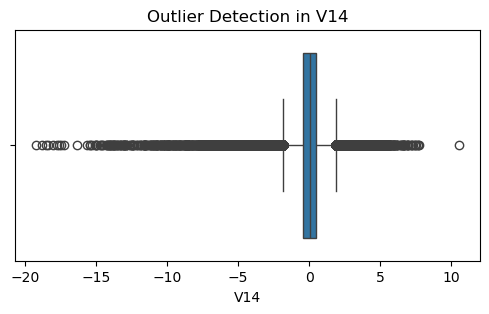

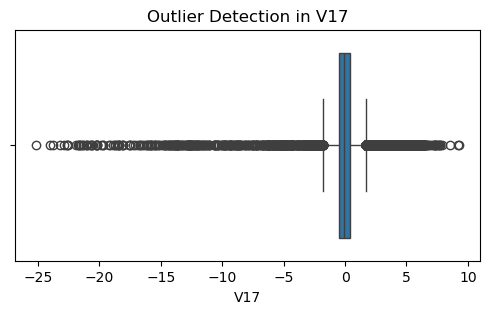

In [42]:
for feature in selected_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[feature])
    plt.title(f'Outlier Detection in {feature}')
    plt.show()

In [43]:
x = df[selected_features]
y = df['Class']
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,test_size=0.3, random_state=42, stratify=y_resampled)

In [44]:
def train_and_evaluate(model, name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"{name} Evaluation:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred)*100)    

In [45]:
train_and_evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")

Logistic Regression Evaluation:
Confusion Matrix:
[[83028  1948]
 [10821 74155]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     84976
           1       0.97      0.87      0.92     84976

    accuracy                           0.92    169952
   macro avg       0.93      0.92      0.92    169952
weighted avg       0.93      0.92      0.92    169952

Accuracy Score: 92.48670212765957


In [46]:
train_and_evaluate(DecisionTreeClassifier(), "Decision Tree")

Decision Tree Evaluation:
Confusion Matrix:
[[84384   592]
 [  351 84625]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.99      1.00      0.99     84976

    accuracy                           0.99    169952
   macro avg       0.99      0.99      0.99    169952
weighted avg       0.99      0.99      0.99    169952

Accuracy Score: 99.44513745057428


In [56]:
train_and_evaluate(RandomForestClassifier(n_estimators=100, n_jobs=-1), "Random Forest")


Random Forest Evaluation:
Confusion Matrix:
[[84689   287]
 [   99 84877]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       1.00      1.00      1.00     84976

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

Accuracy Score: 99.77287704763698


In [57]:
train_and_evaluate(LinearSVC(max_iter=10000), "SVM")

SVM Evaluation:
Confusion Matrix:
[[83575  1401]
 [11730 73246]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     84976
           1       0.98      0.86      0.92     84976

    accuracy                           0.92    169952
   macro avg       0.93      0.92      0.92    169952
weighted avg       0.93      0.92      0.92    169952

Accuracy Score: 92.27370080964037
